In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Titanic.csv")
df_test=pd.read_csv("Titanic_Test.csv")

Text(0.5, 0, '<--Death          Survived -->')

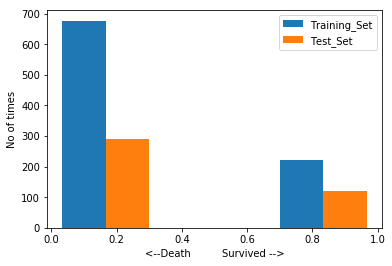

In [353]:
    plt.hist([df['2urvived'],df_test['2urvived']],bins=3)
    plt.ylabel('No of times')
    plt.legend(['Training_Set','Test_Set'])
    plt.xlabel('<--Death          Survived -->')


In [354]:
# Feature scaling function
def scale(X):
    for i in range(1,X.shape[1]):
        x=X[[i]].values
        x=(x-x.mean())/x.std()
        X[[i]]=x 
    return X

In [355]:
# Handling Data

def handle_data(X):
    X.insert(0, 'X0', 1)
    X=scale(X)    
    X_sq=X**2
    X=pd.concat([X,X_sq],axis=1)
    return(X)


In [356]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [357]:
def train(X,y):    
    T=np.array(X.shape[1]*[[0]])
    n=float(X.shape[0])
    r=X.shape[1]
    grad=r*[0]
    # TRAINING DATA USING GRADIENT DESCENT
    J=[]
    m=[]
    alpha=0.02
    for i in range(2000):
        h=sigmoid(np.dot(X,T))
        e=np.square(h-y)
        J.append(e.sum()/n)
        m.append(i)
        grad=np.dot(np.transpose(X),h-y)/n
        T=T-(grad*alpha)
        if(i%200==0):
            print('Cost function after',i,'iteration :',J[i])
    plt.plot(J,m)
    plt.show();
    return (T)    

In [358]:
def predict(h,threshold):
    pred=[]
    for i in range(len(h)): 
        if(h[i]<=threshold):
            pred.append(0)
        if(h[i]>=threshold):
            pred.append(1)
    pred=np.array(pred) 
    return pred

In [359]:
def model(X,T):
    h=sigmoid(np.dot(X,T))
    return(h)

In [360]:
# Calculating Accuracy and Fscore
def evaluate(pred,y):
    count=0
    tp=0
    fp=0
    fn=0
    tn=0
    for i in range(len(y)):
        if(pred[i]==1) and (y[i]==1):
            tp+=1
        if(pred[i]==1) and (y[i]==0):
            fp+=1
        if(pred[i]==0) and (y[i]==1):
            fn+=1        
        if(pred[i]==0) and (y[i]==0):
            tn+=1  
        if(pred[i]==y[i]):
            count+=1
    P=tp/(tp+fp)
    R=tp/(tp+fn)
    F=(2*P*R)/(P+R)
    Acc=(count/len(y))*100
    
    eval = { '':[P,R,F,Acc]} 
    eval=pd.DataFrame(eval,index=['Precision','Recall','Fscore','Accuracy'])
    print(eval)


In [361]:
# For Training Set
X=df[['Age','Fare','Sex','sibsp','Parch', 'Pclass']]
y=df[['2urvived']]
X=handle_data(X)
X=np.array(X)
y=np.array(y)
print(T.shape,X.shape,y.shape)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(14, 1) (898, 14) (898, 1)


Cost function after 0 iteration : 0.25
Cost function after 200 iteration : 0.150433365583916
Cost function after 400 iteration : 0.1438189371543833
Cost function after 600 iteration : 0.14232727245829926
Cost function after 800 iteration : 0.141769187883443
Cost function after 1000 iteration : 0.1414654843095245
Cost function after 1200 iteration : 0.1412575154506083
Cost function after 1400 iteration : 0.1410977438244016
Cost function after 1600 iteration : 0.14096846630635276
Cost function after 1800 iteration : 0.1408614613290713


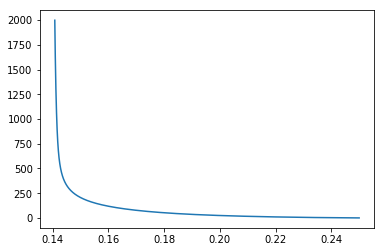

In [362]:
T=train(X,y)
h=model(X,T)

In [374]:
pred=predict(h,0.5)
evaluate(pred,y)

                    
Precision   0.618056
Recall      0.402715
Fscore      0.487671
Accuracy   79.175947


In [375]:
# Cross Validation Test

X_test=df_test[['Age','Fare','Sex','sibsp','Parch', 'Pclass']]
y_test=df_test[['2urvived']]

X_test=handle_data(X_test)
X_test=np.array(X_test)
y_test=np.array(y_test)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [379]:
h=model(X_test,T)
pred=predict(h,0.4)
evaluate(pred,y_test)

                    
Precision   0.655914
Recall      0.504132
Fscore      0.570093
Accuracy   77.615572
